In [3]:
import pandas as pd

data_source = 'bankfull01.csv'

df = pd.read_csv(data_source, delimiter=";")

df

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,39,admin.,single,secondary,no,0,yes,no,unknown,6,may,174,2,-1,0,unknown,no
496,496,39,blue-collar,divorced,secondary,no,42,yes,no,unknown,6,may,226,2,-1,0,unknown,no
497,497,50,blue-collar,divorced,secondary,no,41,yes,no,unknown,6,may,190,1,-1,0,unknown,no
498,498,44,blue-collar,married,secondary,no,-99,yes,no,unknown,6,may,111,2,-1,0,unknown,no


In [4]:
df["y"].value_counts()

no     489
yes     11
Name: y, dtype: int64

In [5]:
df.isna().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
# import library
from imblearn.over_sampling import SMOTE, RandomOverSampler

from sklearn.preprocessing import OrdinalEncoder

smote = SMOTE(k_neighbors=4)

#smote = RandomOverSampler(sampling_strategy="auto")

x_binary = OrdinalEncoder()

x = x_binary.fit_transform(df)

cols = df.columns

print(cols)

x = pd.DataFrame(x, columns = cols )

print(x)

x_source = x.drop(["id","y"],1)

print(x_source)

y = x['y']

print(y)

print(y.shape)

# fit predictor and target variable

x_smote, y_smote = smote.fit_resample(x_source, y)

print(x_smote)

y_smote.value_counts()



Index(['id', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')
        id   age   job  marital  education  default  balance  housing  loan  \
0      0.0  36.0   4.0      1.0        2.0      0.0    328.0      1.0   0.0   
1      1.0  22.0   9.0      2.0        1.0      0.0     62.0      1.0   0.0   
2      2.0  11.0   2.0      1.0        1.0      0.0     40.0      1.0   1.0   
3      3.0  25.0   1.0      1.0        3.0      0.0    313.0      1.0   0.0   
4      4.0  11.0  11.0      2.0        3.0      0.0     39.0      0.0   0.0   
..     ...   ...   ...      ...        ...      ...      ...      ...   ...   
495  495.0  17.0   0.0      2.0        1.0      0.0     38.0      1.0   0.0   
496  496.0  17.0   1.0      0.0        1.0      0.0     69.0      1.0   0.0   
497  497.0  28.0   1.0      0.0        1.0      0.0     68.0      1.0  

C:\Users\agus2\AppData\Local\Temp\ipykernel_5876\2588830715.py:22: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_source = x.drop(["id","y"],1)


0.0    489
1.0    489
Name: y, dtype: int64

In [7]:
print(x_smote)


           age        job   marital  education  default     balance   housing  \
0    36.000000   4.000000  1.000000   2.000000      0.0  328.000000  1.000000   
1    22.000000   9.000000  2.000000   1.000000      0.0   62.000000  1.000000   
2    11.000000   2.000000  1.000000   1.000000      0.0   40.000000  1.000000   
3    25.000000   1.000000  1.000000   3.000000      0.0  313.000000  1.000000   
4    11.000000  11.000000  2.000000   3.000000      0.0   39.000000  0.000000   
..         ...        ...       ...        ...      ...         ...       ...   
973  30.196410   5.267863  1.000000   1.746427      0.0  280.860752  1.000000   
974  21.221853   3.650899  1.912725   1.912725      0.0   40.880083  0.912725   
975  24.201860   2.599380  1.649845   2.000000      0.0   75.116426  0.649845   
976  29.597118   3.701441  1.000000   1.000000      0.0  319.306948  1.000000   
977  25.498169   4.027183  1.000000   1.000000      0.0   56.681127  0.447465   

         loan  contact     

<AxesSubplot: >

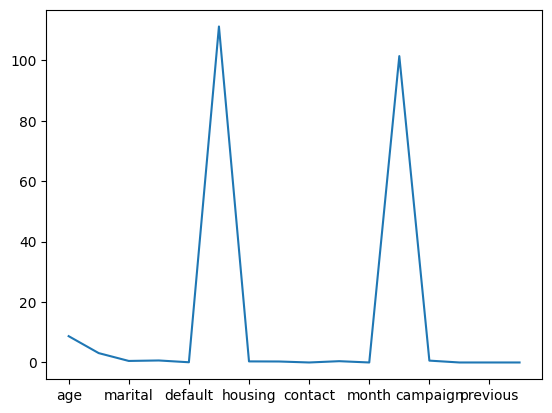

In [8]:
x_smote.std()

x_smote.std().plot()

<AxesSubplot: >

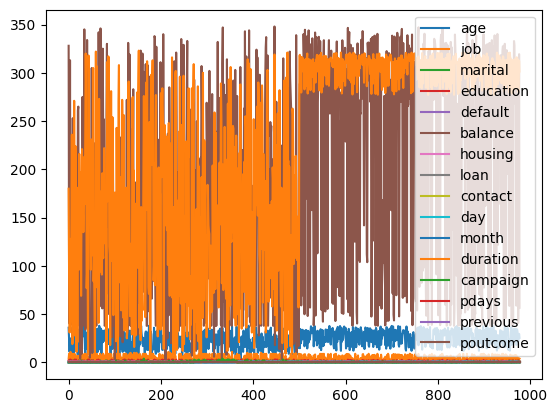

In [9]:
x_smote.plot()

In [11]:
x_smote.value_counts()

age        job       marital   education  default  balance     housing   loan      contact  day       month  duration    campaign  pdays  previous  poutcome
0.000000   1.000000  2.000000  1.000000   0.0      38.000000   1.000000  0.000000  0.0      0.000000  0.0    111.000000  1.000000  0.0    0.0       0.0         1
29.247183  1.357948  1.339487  1.339487   0.0      59.796932   0.339487  0.339487  0.0      0.000000  0.0    303.420524  0.339487  0.0    0.0       0.0         1
29.270576  3.140105  1.000000  1.785026   0.0      274.289843  0.785026  0.785026  0.0      1.000000  0.0    315.504817  0.000000  0.0    0.0       0.0         1
29.322726  5.559091  1.000000  1.688182   0.0      282.666366  1.000000  0.688182  0.0      0.688182  0.0    314.311818  0.000000  0.0    0.0       0.0         1
29.339520  3.447216  1.383024  1.766048   0.0      336.894432  1.000000  0.000000  0.0      0.383024  0.0    314.064192  0.000000  0.0    0.0       0.0         1
                                 

In [12]:
x_smote.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
count,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.0,978.000000,978.0,978.000000,978.000000,978.0,978.0,978.0
mean,24.106340,4.044875,1.068882,1.330881,0.005112,184.855647,0.793956,0.157650,0.0,0.367288,0.0,223.505063,0.335175,0.0,0.0,0.0
std,8.710202,3.098694,0.508509,0.663323,0.071355,111.193644,0.355710,0.325719,0.0,0.428741,0.0,101.391603,0.615001,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
25%,17.000000,1.000000,1.000000,1.000000,0.000000,69.374477,0.696189,0.000000,0.0,0.000000,0.0,129.250000,0.000000,0.0,0.0,0.0
50%,24.000000,4.000000,1.000000,1.000000,0.000000,188.500000,1.000000,0.000000,0.0,0.072710,0.0,281.156239,0.000000,0.0,0.0,0.0
75%,32.015617,7.000000,1.071582,1.847776,0.000000,290.043516,1.000000,0.000000,0.0,0.916114,0.0,311.729211,0.628948,0.0,0.0,0.0
max,39.000000,11.000000,2.000000,3.000000,1.000000,348.000000,1.000000,1.000000,0.0,1.000000,0.0,323.000000,4.000000,0.0,0.0,0.0
